### IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Reading data on Investment Rounds in 2008-18 from investments input

In [2]:
#Reading Total Investments Data for all Companies in the sector between 2008-18

df_inv = pd.read_csv('./input_data/investmentInput.csv')

df_inv.head(3)

,Year,Org_Name,Funding_Round_Type,Funding_Amt_USD,Funding_Stage
0,2018,Zelros,Series A,4532800,Early Stage
1,2018,Axyon AI,Series Unknown,1473160,Uncategorized
2,2018,Oriente,Series A,105000000,Early Stage


##### Note:  For categorization details of Funding Round Types into  Funding Stages See investmentDataMunging.ipynb Sl No. 5 for categorization details

### 2. Set of All Funding Stages

In [3]:
print(df_inv['Funding_Stage'].unique())

['Early Stage' 'Uncategorized' 'Seed' 'Late Stage' 'Private Equity']


### 3.  Deal Size Categorization 

<p><b>Under \$500k</b></p>
<p><b>\$500k - \$1M</b></p>
<p><b>\$1M - \$5M</b></p>
<p><b>\$5M - \$10M</b></p>

### 4. Defining functions to extract and plot  YoY Funding Round Count in each Stage by Deal Size  

##### a. Data Extractor Function

In [4]:
#Extracts info on YoY Funding Rounds Count in a given Funding Stage based on Deal Size from input dataframe

def StageCountByDealSize(fundingStage, df_inp):
    
    #Extracting funding data relevant to funding stage into df_stage
    df_stage = df_inp[df_inp['Funding_Stage']==fundingStage]
    
    #Extracting YoY funding Rounds by Deal Size for each stage
    deals_under500k_count = df_stage['Year'][(df_stage['Funding_Amt_USD']>0) &
                                             (df_stage['Funding_Amt_USD']<=500000)
                                            ].value_counts()

    deals_500k_1M_count = df_stage['Year'][(df_stage['Funding_Amt_USD']>500000) & 
                                           (df_stage['Funding_Amt_USD']<=1000000)
                                          ].value_counts()

    deals_1M_5M_count = df_stage['Year'][(df_stage['Funding_Amt_USD']>1000000) & 
                                         (df_stage['Funding_Amt_USD']<=5000000)
                                        ].value_counts()

    deals_5M_10M_count = df_stage['Year'][(df_stage['Funding_Amt_USD']>5000000) & 
                                          (df_stage['Funding_Amt_USD']<=10000000)
                                         ].value_counts()
    
    deals_10M_25M_count = df_stage['Year'][(df_stage['Funding_Amt_USD']>10000000) & 
                                           (df_stage['Funding_Amt_USD']<=25000000)
                                          ].value_counts()
    
    deals_over25M_count = df_stage['Year'][(df_stage['Funding_Amt_USD']>25000000)
                                          ].value_counts()
    
    deals_count_df = pd.DataFrame({'Under-500k': deals_under500k_count,
                                   '500k-1M': deals_500k_1M_count,
                                   '1M-5M': deals_1M_5M_count,
                                   '5M-10M': deals_5M_10M_count,
                                   '10M-25M': deals_10M_25M_count,
                                   'Over-25M': deals_over25M_count
                                  })
    
    # Name index as Year
    deals_count_df.index.name='Year'
    
    deals_count_df.fillna(0, inplace=True)
    
    deals_count_df.reset_index(drop=False, inplace=True)
    
    # Deleting df_stage dataframe
    del df_stage
    
    return deals_count_df

##### b. Plotter function

In [5]:
def PlotStageCountbyDealSize(df_inp, plotTitle) :
   
    # Setting view styles for plotting graph
    sns.set(style="white", rc={"lines.linewidth": 3})
    
    #Plotting Stacked Bar Graph: Funding Stage Count  w.r.t Year stacked based on Deal Size 
    ax=df_inp.plot.bar(x='Year',y=['Under-500k','500k-1M', 
                                   '1M-5M', '5M-10M',
                                   '10M-25M', 'Over-25M'
                                  ], stacked=True, figsize=(10,6))
    
    #Specifying title, labels & legend 
    ax.set_title(plotTitle,fontdict={'fontsize':13,'fontweight':'bold'})
    ax.legend() 
    ax.set(xlabel='Year', ylabel='Funding Rounds')
    
    plt.xticks(rotation=0)
    
    #Resetting view styles to default
    sns.set()


###  5. Extracting data and plotting Results

### a. Seed Stage

In [6]:
# Extracting seed_stage No. of Funding Rounds by Deal Size from input df_inv

seed_deals_count_df = StageCountByDealSize('Seed',df_inv)

seed_deals_count_df.head(3)

,Year,Under-500k,500k-1M,1M-5M,5M-10M,10M-25M,Over-25M
0,2009,1,0.0,0.0,0.0,0.0,0.0
1,2010,2,0.0,0.0,0.0,0.0,0.0
2,2011,2,0.0,2.0,0.0,0.0,0.0


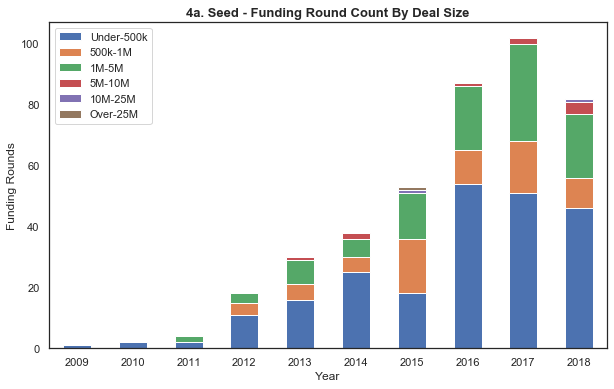

In [7]:
#Plotting trends from seed_count_df

plotTitle = '4a. Seed - Funding Round Count By Deal Size'

PlotStageCountbyDealSize(seed_deals_count_df, plotTitle)

#Saving to output png file

plt.savefig('./output/plots/4a_YoY-Seed_Count_by_DealSize.png', dpi=100)

### b. Early Stage

In [8]:
# Extracting early_stage No. of Funding Rounds by Deal Size from input df_inv

early_stage_deals_count_df = StageCountByDealSize('Early Stage',df_inv)

early_stage_deals_count_df.head(3)

,Year,Under-500k,500k-1M,1M-5M,5M-10M,10M-25M,Over-25M
0,2008,0.0,0.0,0.0,1,0.0,0.0
1,2011,0.0,0.0,0.0,1,1.0,0.0
2,2012,0.0,0.0,3.0,1,1.0,0.0


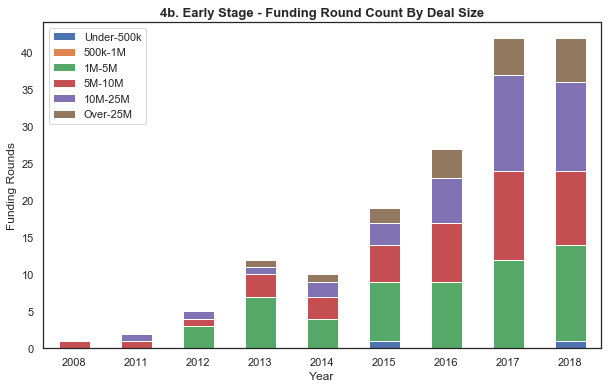

In [9]:
#Plotting trends from early_stage_deals_count_df 

plotTitle = '4b. Early Stage - Funding Round Count By Deal Size'

PlotStageCountbyDealSize(early_stage_deals_count_df, plotTitle)

#Saving to output png file

plt.savefig('./output/plots/4b_YoY-EarlyStage_Count_by_DealSize.png', dpi=100)

### c. Late Stage

In [10]:
# Extracting seed_stage No. of Funding Rounds by Deal Size from input df_inv

late_stage_deals_count_df = StageCountByDealSize('Late Stage',df_inv)

late_stage_deals_count_df.head(3)

,Year,Under-500k,500k-1M,1M-5M,5M-10M,10M-25M,Over-25M
0,2013,0.0,1.0,0.0,0.0,2.0,0.0
1,2014,0.0,0.0,0.0,1.0,0.0,0.0
2,2015,0.0,0.0,0.0,0.0,1.0,2.0


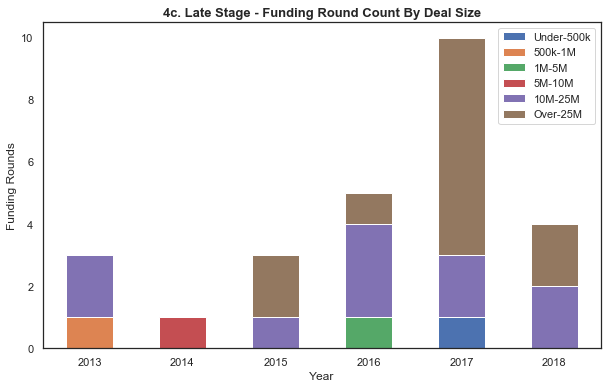

In [11]:
#Plotting trends from late_stage_deals_count_df

plotTitle = '4c. Late Stage - Funding Round Count By Deal Size'

PlotStageCountbyDealSize(late_stage_deals_count_df, plotTitle)

#Saving to output png file

plt.savefig('./output/plots/4c_YoY-LateStage_Count_by_DealSize.png', dpi=100)

### 6. Saving results to file

In [12]:
# Writing data to output excel file

from openpyxl import load_workbook

book = load_workbook('./output/outputData.xlsx')

writer = pd.ExcelWriter('./output/outputData.xlsx', engine='openpyxl')

writer.book = book

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

seed_deals_count_df.to_excel(writer, '4a.YoY-Seed_Rounds_by_DealSize', index=False)

early_stage_deals_count_df.to_excel(writer,'4b.YoY-Early_Rounds_by_DealSize', index=False)

late_stage_deals_count_df.to_excel(writer,'4c.YoY-Late_Rounds_by_DealSize', index=False)

writer.save()

### 7. Deleting dataframes to deallocate memory

In [13]:
del df_inv
del seed_deals_count_df
del early_stage_deals_count_df
del late_stage_deals_count_df